In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dota-dataset/1614507_events.jsonl
/kaggle/input/dota-dataset/1598060_state.json
/kaggle/input/dota-dataset/1614507_state.json
/kaggle/input/dota-dataset/1597139_events.jsonl
/kaggle/input/dota-dataset/1597139_state.json
/kaggle/input/dota-dataset/1598060_events.jsonl


In [2]:
data_file = "../input/dota-dataset/1614507_events.jsonl"
with open(data_file) as f:
    lines = f.read().splitlines()

line_dicts = [json.loads(line) for line in lines]
df = pd.DataFrame(line_dicts)

In [3]:
# Parsing the data set and creating a dataframe named events 
events = pd.DataFrame()
for index, row in df.iterrows():
    events = pd.concat([events,pd.json_normalize(row['events'][0])])
events.reset_index(drop=True,inplace=True)  

# 1. Which champions had the most kills per game? 

In [4]:
# Select character name and kills columns only, drop the other columns
new_df = events.loc[:, ['actor.state.game.character.name', 'actor.state.game.kills']]


# Group the new dataframe by mean amt of kills per character
kills_avg = new_df.groupby(['actor.state.game.character.name']).mean()

# Sort the grouped DF by kills 
char_kills_sort =  kills_avg.sort_values(by = 'actor.state.game.kills' ,ascending=False)
top_ten_kills = char_kills_sort.head(10)
top_ten_kills


,actor.state.game.kills
actor.state.game.character.name,
faceless void,5.775061
troll warlord,4.296460
puck,4.047619
zuus,3.786957
brewmaster,3.069364
pudge,2.646341
dazzle,2.521898
pangolier,2.318725
nyx assassin,2.181818


## 1.1 Top 10 characters with the highest mean count of kills per game

<Axes: xlabel='actor.state.game.character.name'>

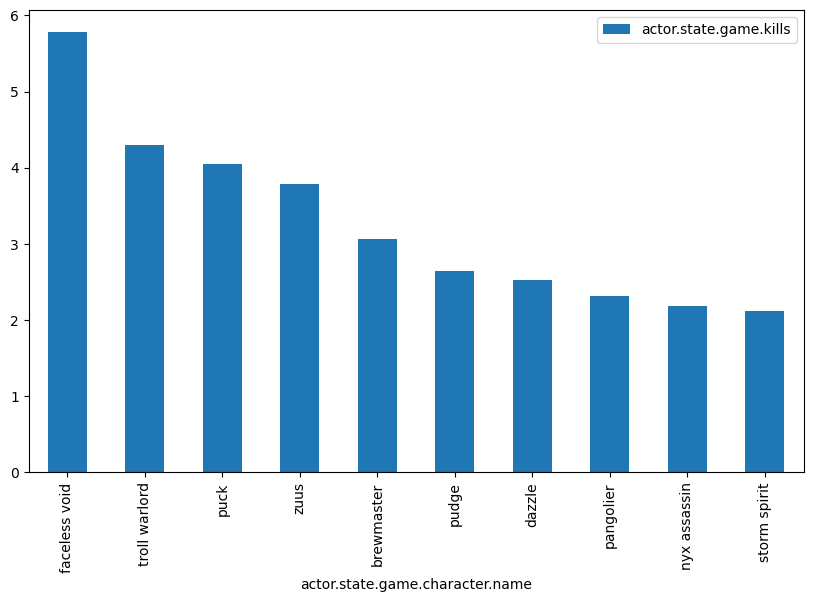

In [5]:
# Using Pandas to plot bar chart
top_ten_kills.plot.bar(figsize = (10, 6))

# 2. Which champions had the most deaths per game? 

In [6]:
# Select character name and deaths columns only, drop the other columns
new_df = events.loc[:, ['actor.state.game.character.name', 'actor.state.game.deaths']]


# Group the new dataframe by mean amt of deaths per character
deaths_avg = new_df.groupby(['actor.state.game.character.name']).mean()

# Sort the grouped DF by deaths and keep the top 10 characters 
char_deaths_sort =  deaths_avg.sort_values(by = 'actor.state.game.deaths' ,ascending=False)

# Looking at the top 10 characters for graph and table
top_ten_deaths = char_kills_sort.head(10)
top_ten_deaths

,actor.state.game.kills
actor.state.game.character.name,
faceless void,5.775061
troll warlord,4.296460
puck,4.047619
zuus,3.786957
brewmaster,3.069364
pudge,2.646341
dazzle,2.521898
pangolier,2.318725
nyx assassin,2.181818


## 2.1 Top 10 characters with the highest mean count of deaths per game

<Axes: xlabel='actor.state.game.character.name'>

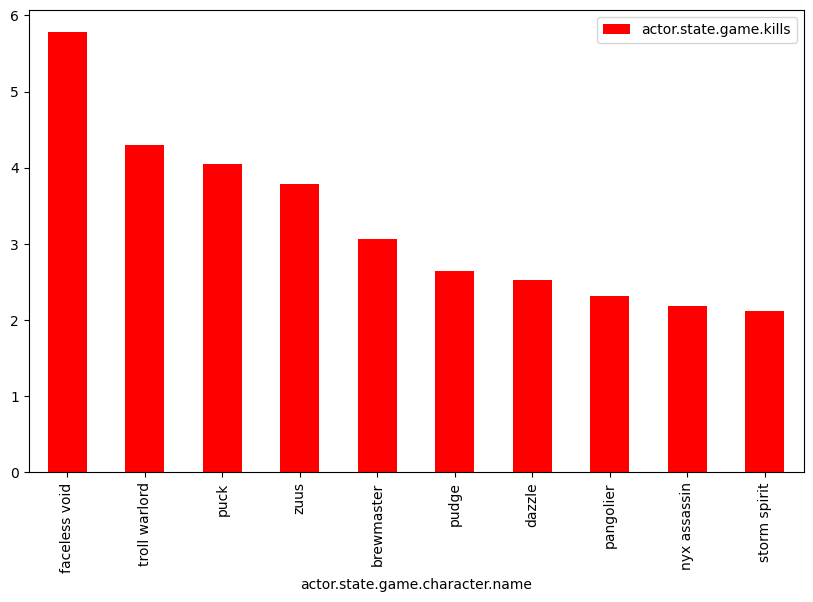

In [7]:
# Using Pandas to plot bar chart
top_ten_deaths.plot.bar(figsize = (10, 6), color='red')

# 3. Which champions had the most assists per game? 

In [8]:
# Select character name and kills columns only, drop the other columns
new_df = events.loc[:, ['actor.state.game.character.name', 'actor.state.game.killAssistsGiven']]


# Group the new dataframe by mean amt of kills per character
assists_avg = new_df.groupby(['actor.state.game.character.name']).mean()

# Sort the grouped DF by kills and keep the top 10 characters 
char_assists_sort =  assists_avg.sort_values(by = 'actor.state.game.killAssistsGiven' ,ascending=False)
top_ten_assists = char_assists_sort.head(10)
top_ten_assists


,actor.state.game.killAssistsGiven
actor.state.game.character.name,
zuus,10.400000
tiny,8.923077
nyx assassin,8.125000
tusk,7.506562
winter wyvern,6.603854
brewmaster,6.352601
faceless void,6.200489
pudge,4.481707
enigma,4.308333


## 3.1 Top 10 characters with the highest mean count of assists given per game

<Axes: xlabel='actor.state.game.character.name'>

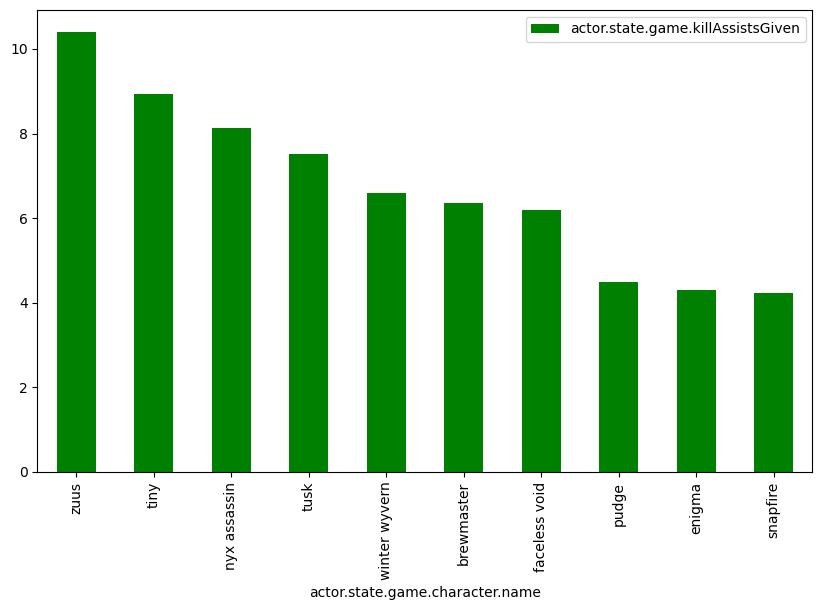

In [9]:
# Using Pandas to plot bar chart
top_ten_assists.plot.bar(figsize = (10, 6), color='green')

# 4. Highest KDA by character

Now that we have `kills_avg`, `deaths_avg`, and `assists_avg`, we can calculate KDA per character by using the equation 

$KDA = (Kills + Assists) / Death$



In [10]:
# Combining all avg tables into 1
table_all = pd.concat([kills_avg, assists_avg,deaths_avg], axis=0).fillna(0) # .fillna(0) is used to fill all NaN values with 0 instead (for calculation purposes)

# Calculating KD
# Creating a new column that is the sum of average kills and assists called KD
table_all['KA'] = table_all['actor.state.game.kills'] + table_all['actor.state.game.killAssistsGiven']

# Calculating KDA 
# If a character has 0 deaths, replace 0 with 1 for calculation purposes. (The equation will res in inf if divisor is 0)
table_all['actor.state.game.deaths'] = table_all['actor.state.game.deaths'].replace(0,1)

# Creating KA and d variables for model use
ka_top10 = table_all['KA']
death_top10 = table_all['actor.state.game.deaths']

# Creating a new column that is given by the equation (KD / deaths), called KDA
table_all['KDA'] = table_all['KA'] / table_all['actor.state.game.deaths']

# Drop all columns except KDA
kda = table_all.loc[:, ['KDA']]
# Sort by ascending
kda_sorted = kda.sort_values(by = 'KDA' ,ascending=False)
# Look at top 10 champs with highest KDA 
kda_top10 = kda_sorted.head(10)
kda_top10

,KDA
actor.state.game.character.name,
zuus,10.400000
tiny,8.923077
nyx assassin,8.125000
tusk,7.506562
winter wyvern,6.603854
brewmaster,6.352601
faceless void,6.200489
faceless void,5.775061
pudge,4.481707


## 4.1 Top 10 characters with the highest mean KDA

<Axes: xlabel='actor.state.game.character.name'>

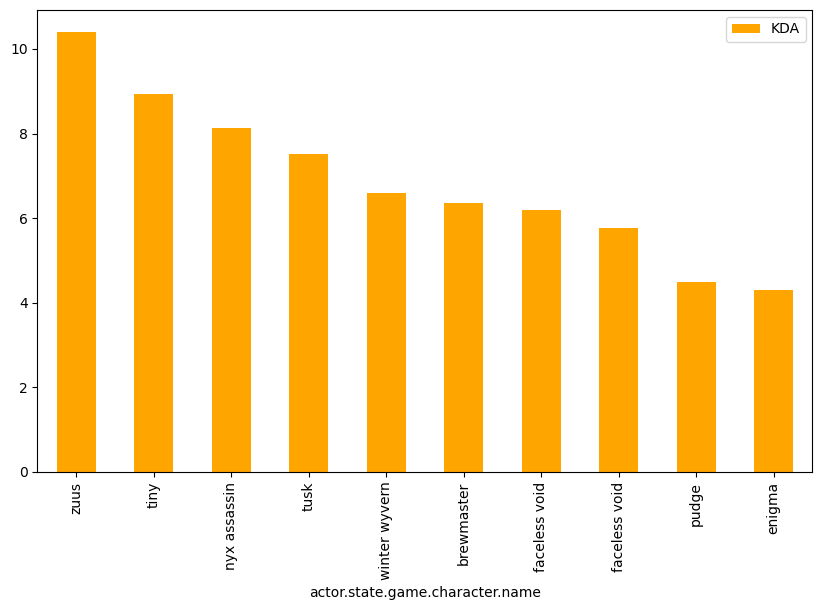

In [11]:
kda_top10.plot.bar(figsize = (10, 6), color='orange')

# Using linear regression using Kill + Assists to predict death by champion

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Provide data
X = np.array(ka_top10).reshape(-1, 1) # Using top 10 K+A 
y = np.array(death_top10) # Using deaths as y variable

print(X.shape, y.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(75, 1) (75,)


In [13]:
# Create model and fit
model = LinearRegression()
model.fit(X,y)

# Score of the model
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.051826224700031176
